# Iris analysis

In [14]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')

**Description of the dataset**

The dataset under analysis contains information about the Iris plant. Specifically, it includes morphological measurements of the flowers—such as petal and sepal length and width—for three distinct species of Iris: Iris setosa, Iris versicolor, and Iris virginica.

In [15]:
df_iris = pd.read_csv('data/Iris.csv')

In [16]:
df_iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [17]:
df_iris.shape

(150, 6)

The dataset consists of 150 records, each representing a flower sample from the Iris species. Each record is characterized by 5 features, detailed as follows:

- **SepalLengthCm** and **SepalWidthCm**: these indicate the length and width of the sepal, which are leaf-like structures located beneath the petals. Sepals play a protective role during the budding phase and help shield the flower from external threats, such as insect attacks.
- **PetalLengthCm** and **PetalWidthCm**: these represent the length and width of the petal—the colorful part of the flower responsible for attracting pollinators.
- **Species**: specifies the species to which each flower belongs. The dataset includes data from three Iris species: **Setosa**, **Versicolor**, **Virginica**.

<img src="images/Setosa.jpg" width="300"/>
<img src="images/Versicolor.jpg" width="300"/>
<img src="images/Virginica.jpg" width="300"/>

In [18]:
df_iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [19]:
df_iris.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


# Data Exploration

In [20]:
df_iris.drop('Id', axis=1, inplace=True)

array([[<Axes: title={'center': 'SepalLengthCm'}>,
        <Axes: title={'center': 'SepalWidthCm'}>],
       [<Axes: title={'center': 'PetalLengthCm'}>,
        <Axes: title={'center': 'PetalWidthCm'}>]], dtype=object)

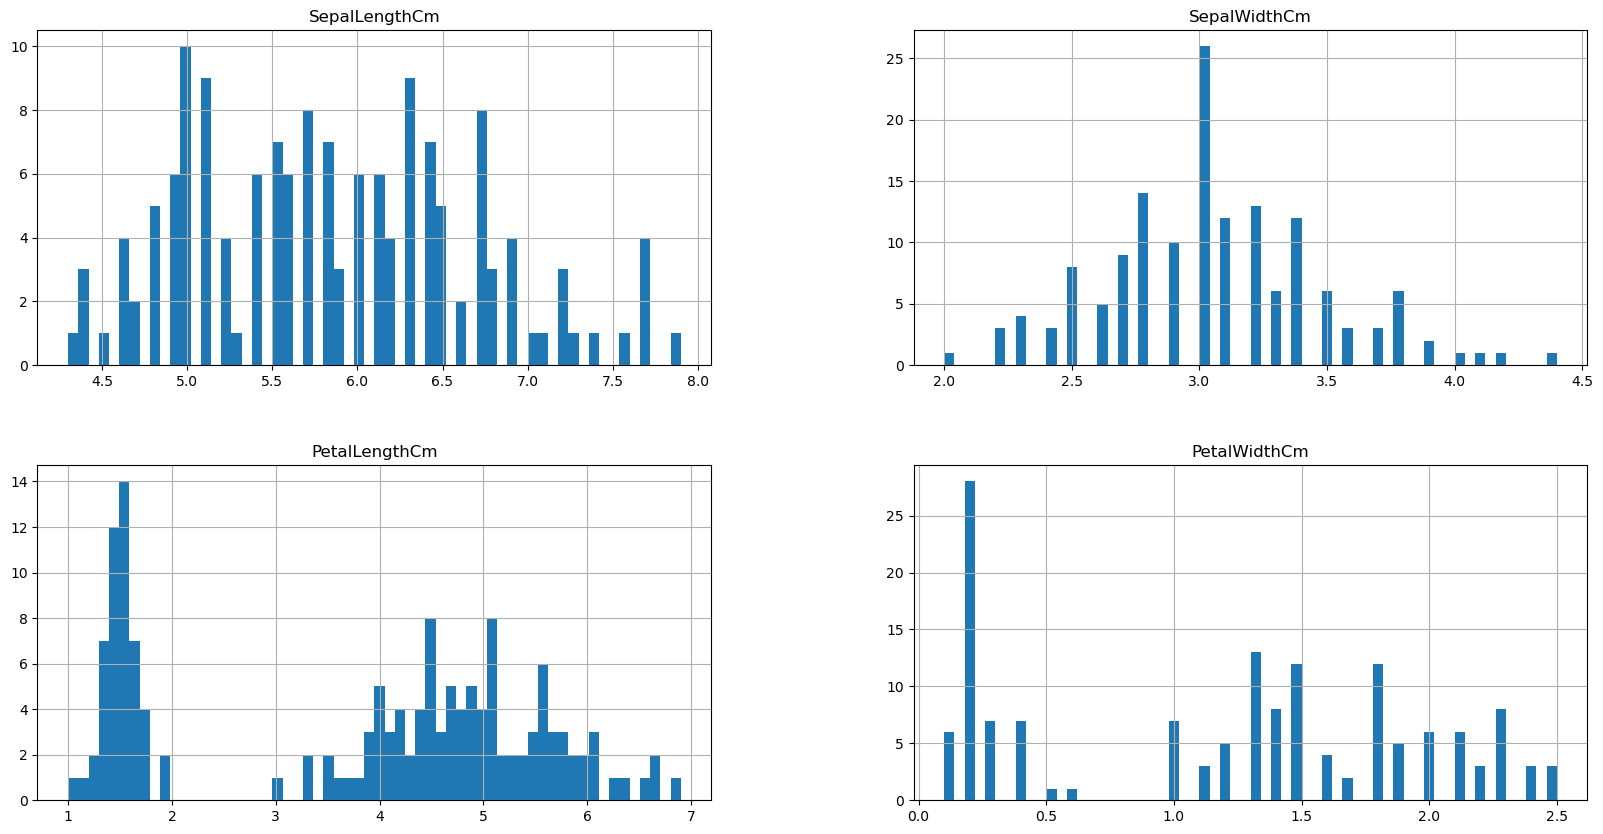

In [21]:
df_iris.hist(figsize=(20, 10), bins=60)